In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Reading the MNIST data set

In [2]:
d0 = pd.read_csv('./mnist_train.csv')
print(d0.head(10))

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   
5      2    0    0    0    0    0    0    0    0    0  ...      0      0   
6      1    0    0    0    0    0    0    0    0    0  ...      0      0   
7      3    0    0    0    0    0    0    0    0    0  ...      0      0   
8      1    0    0    0    0    0    0    0    0    0  ...      0      0   
9      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0

In [3]:
l = d0['label']
d = d0.drop('label', axis=1)

print(l.shape, d.shape)

(60000,) (60000, 784)


The value below is 3


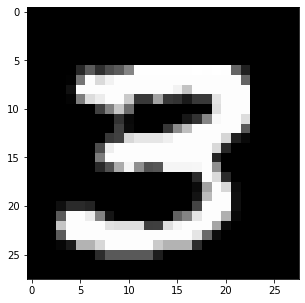

In [4]:
plt.figure(figsize=(5, 5))
_id = 111

grid_data = d.iloc[_id].values.reshape(28, 28)
plt.imshow(grid_data, interpolation='none', cmap='gray')
print('The value below is', l[_id])
plt.show()

# 2D visualization of MNIST using sklearn

In [5]:
# Taking a sample data, first 15000 entries
label = l.head(15000)
data = d.head(15000)

print('Shape of the data: ', data.shape)

Shape of the data:  (15000, 784)


# Standardizing the data set

In [6]:
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler().fit_transform(data)
print(standard_data.shape)

(15000, 784)


In [7]:
# Creating the co-variance matrix A^T * A
sample_data = standard_data

covar_martix = np.matmul(sample_data.T, sample_data)
print('Shape of the co-varience matrix: ', covar_martix.shape)

Shape of the co-varience matrix:  (784, 784)


In [8]:
from scipy.linalg import eigh
values, vectors = eigh(covar_martix, eigvals=(782, 783))
print('Shape of eigen vectors: ', vectors.shape)
vectors = vectors.T

print('Shape of the updated eigen vectors: ', vectors.shape)

Shape of eigen vectors:  (784, 2)
Shape of the updated eigen vectors:  (2, 784)


In [9]:
# Dimension reduction from 784-d to 2-d
new_coordinates= np.matmul(vectors, sample_data.T)
print('The resultant new data points shape: ', vectors.shape, 'X', sample_data.T.shape, '=', new_coordinates.shape)

The resultant new data points shape:  (2, 784) X (784, 15000) = (2, 15000)


In [10]:
new_coordinates = np.vstack((new_coordinates, label)).T

In [11]:
print('The shape of the new dataset is: ', new_coordinates.shape)

The shape of the new dataset is:  (15000, 3)


In [12]:
matrix_df = pd.DataFrame(data=new_coordinates, columns=('1st Principal', '2nd Principal', 'labels'))
print(matrix_df.head(5))

   1st Principal  2nd Principal  labels
0      -4.457050       0.960769     5.0
1      -7.397795      -8.658155     0.0
2       9.640690      -2.082854     4.0
3      -3.356074       7.187465     1.0
4       2.979880       4.933889     9.0


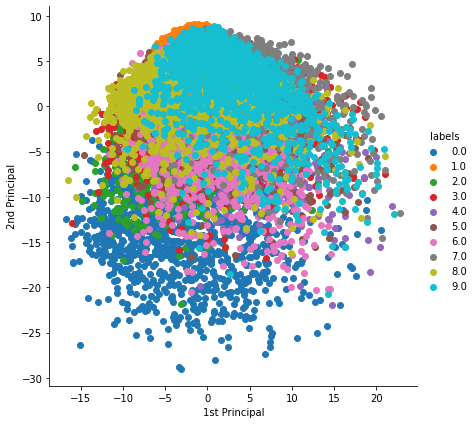

In [13]:
sn.FacetGrid(matrix_df, hue='labels', height=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

# 2D Visualization of MNIST using PCA

In [14]:
from sklearn import decomposition
pca = decomposition.PCA()

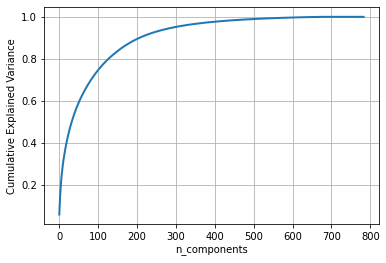

In [15]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_ver_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_ver_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

It can be seen that even if 200 dimensions are taken, about 90% of the variance is explained

In [16]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print('Shape of the reduced data: ', pca_data.shape)

Shape of the reduced data:  (15000, 2)


In [17]:
pca_data = np.vstack((pca_data.T, label)).T

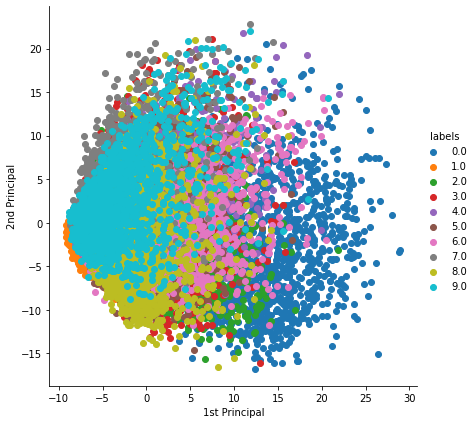

In [18]:
pca_df = pd.DataFrame(data=pca_data, columns=('1st Principal', '2nd Principal', 'labels'))
sn.FacetGrid(pca_df, hue='labels', height=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()